In [2]:
import random
import json
import numpy as np
import torch
import tqdm
from deepis import *
from deepis.utils import plot_dominating_points
import matplotlib.pyplot as plt

#Setting constants
OUTPUT_INCREMENT = 1000
SAVE_EVERY = 1000

# Setting random seed
seed = 123
np.random.seed(seed)
random.seed(seed)

# Defining problem
Problem = GaussianTailProbability(mu=[0, 0], sigma=0.5, rad=4.5)

# Calculating ground truth value
print("Tail probability: {:.3e}".format(Problem.compute_target()))

Tail probability: 1.605e-09


In [3]:
# Collecting initial samples
n1 = 2000
total_N = int(1e4)
lb, ub = -5, 5
X = np.random.uniform(0, ub-lb, size=[n1, Problem.dim]) - ub
Y = Problem.f(X)

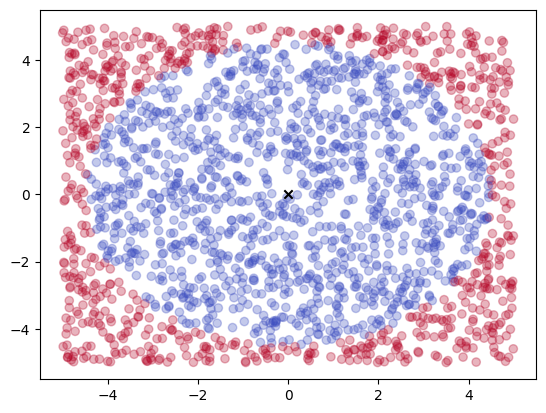

In [5]:
plt.scatter(X[:,0], X[:,1], c=Y, cmap="coolwarm", alpha=0.3)
plt.scatter(Problem.mu[0], Problem.mu[1], marker='x', c='k')
plt.show()

In [ ]:
# Training neural network
net = train_neural_network(X, Y, log=True, save=True, path="net.pth")
print("\nTraining done")
def fhat(x): return np.diff(net(torch.Tensor(x)).cpu().data.numpy(), axis=-1) >= 0


In [ ]:
# initiating grids
x1_grid = np.linspace(lb, ub, 100)
x2_grid = np.linspace(lb, ub, 100)
x1s, x2s = np.meshgrid(x1_grid, x2_grid)
xs = np.array([x1s.reshape(-1), x2s.reshape(-1)]).transpose()
ys = Problem.f(xs)

plt.contourf(x1s, x2s, fhat(xs).reshape(x1s.shape), cmap="coolwarm")
plt.show()

In [ ]:
# Optimizing proposal distribution using DeepIS
W = net.extract_params()
DeepISModelOpt = DeepISModel()
DeepISModelOpt.generate_opt_model(W)
DeepISModelOpt.solve()
DeepIS_proposal = PropDist(mu=DeepISModelOpt.dominating_points, sigma=Problem.sigma)


In [ ]:
plot_dominating_points(X, Y, DeepISModelOpt.dominating_points)

# Problem 2

In [ ]:
from deepis.problems import PolySqrt

Problem2 = PolySqrt()
Y2 = Problem2.f(X)

## Collecting initial samples
n1 = 2000
total_N = int(1e4)
lb, ub = -20, 20
X = np.random.uniform(0, ub-lb, size=[n1, Problem.dim]) - ub
Y = Problem2.f(X)

# initiating grids
x1_grid = np.linspace(lb, ub, 100)
x2_grid = np.linspace(lb, ub, 100)
x1s, x2s = np.meshgrid(x1_grid, x2_grid)
xs = np.array([x1s.reshape(-1), x2s.reshape(-1)]).transpose()
ys = Problem2.f(xs)
yss= ys.reshape(x1s.shape)

In [ ]:
plt.scatter(X[:,0], X[:,1], c=Y, cmap="coolwarm", alpha=0.3)
plt.scatter(Problem2.mu[0], Problem2.mu[1], marker='x', c='k')
plt.show()

In [ ]:
# Training neural network
net = train_neural_network(X, Y, log=True, save=True, path="net2.pth")
print("\nTraining done")
def fhat(x): return np.diff(net(torch.Tensor(x)).cpu().data.numpy(), axis=-1) >= 0

In [ ]:
plt.contourf(x1s, x2s, fhat(xs).reshape(x1s.shape), cmap="coolwarm")
plt.show()

In [ ]:
# Optimizing proposal distribution using DeepIS
W = net.extract_params()
DeepISModelOpt = DeepISModel()
DeepISModelOpt.generate_opt_model(W)
DeepISModelOpt.solve()
DeepIS_proposal = PropDist(mu=DeepISModelOpt.dominating_points, sigma=Problem2.sigma)

In [ ]:
plot_dominating_points(X, Y, DeepISModelOpt.dominating_points)

# Problem 3

In [6]:
from deepis.problems import FourBranches

Problem2 = FourBranches()
Y2 = Problem2.f(X)

## Collecting initial samples
n1 = 2000
total_N = int(1e4)
lb, ub = -20, 20
X = np.random.uniform(0, ub-lb, size=[n1, Problem.dim]) - ub
Y = Problem2.f(X)

# initiating grids
x1_grid = np.linspace(lb, ub, 100)
x2_grid = np.linspace(lb, ub, 100)
x1s, x2s = np.meshgrid(x1_grid, x2_grid)
xs = np.array([x1s.reshape(-1), x2s.reshape(-1)]).transpose()
ys = Problem2.f(xs)
yss= ys.reshape(x1s.shape)

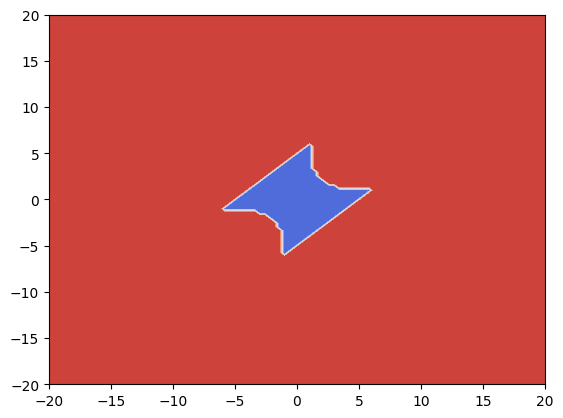

In [8]:
plt.contourf(x1s, x2s, yss, cmap="coolwarm")
plt.show()

In [9]:
# Training neural network
net = train_neural_network(X, Y, log=True, save=True, path="net2.pth")
print("\nTraining done")
def fhat(x): return np.diff(net(torch.Tensor(x)).cpu().data.numpy(), axis=-1) >= 0

Logging set as true:
network saved at: net2.pthlse Pos Rate: 0.002, False Neg Rate: 0.002

Training done


In [10]:
# Optimizing proposal distribution using DeepIS
W = net.extract_params()
DeepISModelOpt = DeepISModel()
DeepISModelOpt.generate_opt_model(W)
DeepISModelOpt.solve()
DeepIS_proposal = PropDist(mu=DeepISModelOpt.dominating_points, sigma=Problem2.sigma)

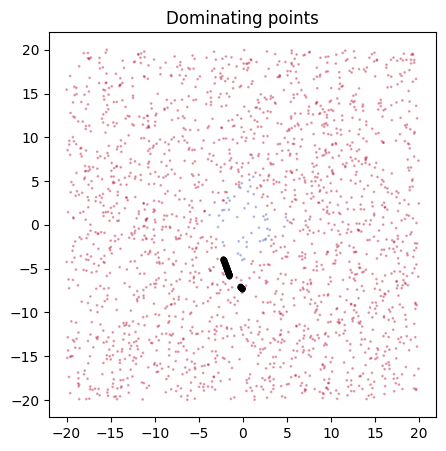

In [11]:
plot_dominating_points(X, Y, DeepISModelOpt.dominating_points)